# Введение в RL и пакет Gymnasium

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://gymnasium.farama.org/
* https://pypi.org/project/ufal.pybox2d/
* https://gymnasium.farama.org/tutorials/gymnasium_basics/environment_creation/
* https://gymnasium.farama.org/api/spaces/fundamental/
* https://gymnasium.farama.org/environments/toy_text/blackjack/

## Задачи для совместного разбора

1. Рассмотрите пример создания окружения `gymnasium` и основные этапы взаимодействия с этим окружением.
<img src="https://gymnasium.farama.org/_images/AE_loop.png" width="300"/>

In [ ]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 11.0 MB/s eta 0:00:00


In [ ]:
!pip install ufal.pybox2d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 21.0 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym

env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset(seed=42)

In [ ]:
observation

array([ 0.00229702,  1.4181306 ,  0.2326471 ,  0.3204666 , -0.00265488,
       -0.05269805,  0.        ,  0.        ], dtype=float32)

In [ ]:
# action = env.action_space.sample()
observation, reward, terminated, truncated, info = env.step(0)

In [ ]:
terminated, truncated

(False, False)

In [ ]:
def policy(env):
  return env.action_space.sample()

In [ ]:
done = False
observation, info = env.reset(seed=42)

while not done:
  action = policy(env)
  observation, reward, terminated, truncated, info = env.step(action)
  print(f"{action=} {reward=}")
  done = terminated or truncated

## Задачи для самостоятельного решения

In [ ]:
%%capture
!pip install gymnasium

In [ ]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces
from gymnasium.wrappers import RecordVideo

import warnings
warnings.filterwarnings("ignore")

<p class="task" id="1"></p>

### 1
Создайте окружение `Blackjack-v1`. Сыграйте `N=10000` игр, выбирая действие случайным образом. Посчитайте и выведите на экран долю выигранных игр.

- [x] Проверено на семинаре

In [ ]:
env = gym.make("Blackjack-v1")
observation, info = env.reset()
observation

(13, 5, 0)

In [ ]:
observation, reward, terminated, truncated, info = env.step(1)
observation, terminated, reward

((16, 5, 0), False, 0.0)

In [ ]:
observation, reward, terminated, truncated, info = env.step(0)
observation, terminated, reward

((16, 5, 0), True, 1.0)

In [ ]:
env = gym.make("Blackjack-v1")

num_games = 10000
num_wins = 0

for i in range(num_games):
    observation, info = env.reset()
    terminated = False
    while not terminated:
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)
    if reward == 1:
        num_wins += 1

win_percentage = (num_wins / num_games) * 100
print(f"Процент побед при случайном выборе действий: {win_percentage:.2f}%")

Процент побед при случайном выборе действий: 28.20%


<p class="task" id="2"></p>

### 2
Создайте окружение `Blackjack-v1`. Предложите стратегию, которая позволит, в среднем, выигрывать чаще, чем случайный выбор действия. Реализуйте эту стратегию и сыграйте `N=10000` игр, выбирая действие согласно этой стратегии. Посчитайте и выведите на экран долю выигранных игр.

- [x] Проверено на семинаре

In [ ]:
def policy16(env):
    if observation[0] < 16:
        return env.step(1)
    else:
        return env.step(0)

env = gym.make("Blackjack-v1")

num_games = 10000
num_wins = 0

for i in range(num_games):
    observation, info = env.reset()
    terminated = False
    while not terminated:
        observation, reward, terminated, truncated, info = policy16(env)
    if reward == 1:
        num_wins += 1

win_percentage = (num_wins / num_games) * 100
print(f"Процент побед при доборе до 16: {win_percentage:.2f}%")

Процент побед при доборе до 16: 42.13%


<p class="task" id="3"></p>

### 3
Создайте окружение для игры в крестики-нолики, реализовав интерфейс `gym.Env`. Решение должно удовлетворять следующим условиям:
* для создания пространства состояний используется `spaces.Box`;
* для создания пространства действий используется `spaces.MultiDiscrete`;
* игра прекращается, если:
    - нет возможности сделать ход;
    - игрок пытается отметить уже выбранную ячейку.
* после каждого хода игрок получает награду:
    - 0, если игра не закончена;
    - 1, если игрок выиграл;
    - -1, если игрок проиграл.
* стратегию выбора действия для второго игрока (машины) определите самостоятельно.

Сыграйте одну игру, выбирая действия случайным образом. Выведите на экран состояние окружения после каждого хода и итоговую награду пользователя за сессию.

- [ ] Проверено на семинаре

<p class="task" id="4"></p>

### 4
Предложите стратегию (в виде алгоритма без использования методов машинного обучения), которая позволит, в среднем, выигрывать в крестики-нолики чаще, чем случайный выбор действия. Реализуйте эту стратегию и сыграйте игру, выбирая действия согласно этой стратегии. Выведите на экран состояние окружения после каждого хода и итоговую награду пользователя за сессию.

- [ ] Проверено на семинаре

<p class="task" id="5"></p>

### 5
Создайте окружение `MountainCar-v0`. Проиграйте 10 эпизодов и сохраните на диск файл с записью каждого пятого эпизода. Для записи видео воспользуйтесь обёрткой `RecordVideo`. Вставьте скриншот, на котором видно, что файлы были созданы.

- [ ] Проверено на семинаре

In [ ]:
def trigger(step):
    if (step + 1) % 5 == 0:
        return True
    else:
        return False

env = gym.make("MountainCar-v0", render_mode="rgb_array")

video_path = "/content/"

env = RecordVideo(env, video_path, episode_trigger=trigger)

for i in range(10):
    observation = env.reset()
    terminated, truncated = False, False

    while not (terminated or truncated):
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)

Moviepy - Building video /content/rl-video-episode-4.mp4.
Moviepy - Writing video /content/rl-video-episode-4.mp4



Moviepy - Done !
Moviepy - video ready /content/rl-video-episode-4.mp4
Moviepy - Building video /content/rl-video-episode-9.mp4.
Moviepy - Writing video /content/rl-video-episode-9.mp4



Moviepy - Done !
Moviepy - video ready /content/rl-video-episode-9.mp4


**Доказательство**

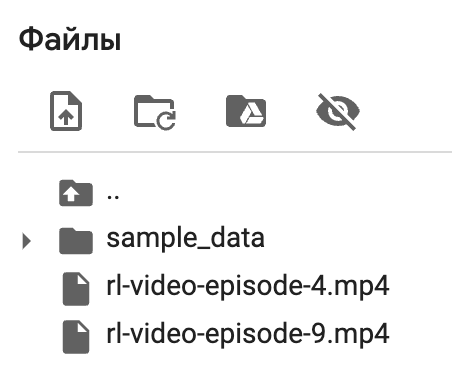

## Обратная связь
- [ ] Хочу получить обратную связь по решению